<a href="https://www.kaggle.com/code/alawdisoft/fake-news-classifiers-emedding-glove-lstm-0-996?scriptVersionId=134253150" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# About Dataset

**Acknowledgements**

Ahmed H, Traore I, Saad S. “Detecting opinion spams and fake news using text classification”, Journal of Security and Privacy, Volume 1, Issue 1, Wiley, January/February 2018.
Ahmed H, Traore I, Saad S. (2017) “Detection of Online Fake News Using N-Gram Analysis and Machine Learning Techniques. In: Traore I., Woungang I., Awad A. (eds) Intelligent, Secure, and Dependable Systems in Distributed and Cloud Environments. ISDDC 2017. Lecture Notes in Computer Science, vol 10618. Springer, Cham (pp. 127-138).

**Inspiration**

Can you use this data set to make an algorithm able to determine if an article is fake news or not ?



![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/12/q.png)

# **if you like this kernel,please do an upvote**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from wordcloud import WordCloud,STOPWORDS
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from keras.layers import Embedding , Dense , LSTM , SpatialDropout1D 
from keras.models import Sequential
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
import gensim
import warnings

warnings.filterwarnings('ignore')

/kaggle/input/glove6b100dtxt/glove.6B.100d.txt
/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
true =pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')
true['is_true'] = 1
true

,title,text,subject,date,is_true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [3]:
true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [4]:
false = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
false['is_true']=0
false

,title,text,subject,date,is_true
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [5]:
false.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [6]:
true.shape , false.shape

((21417, 5), (23481, 5))

In [7]:
df = pd.concat([true , false ] , axis=0 )
df

,title,text,subject,date,is_true
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [8]:
df['text'] = df['title'] +' '+df['text']
del df['title']

<AxesSubplot: >

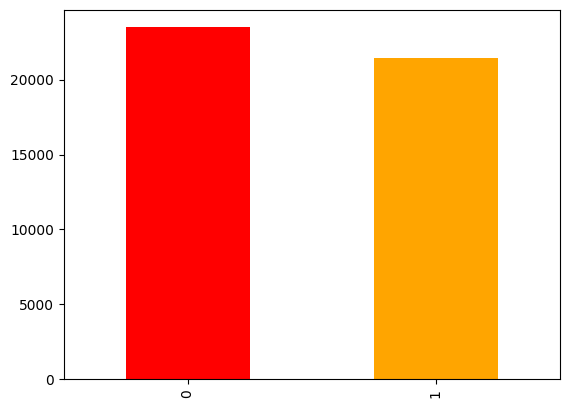

In [9]:
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'gray']

df['is_true'].value_counts().plot(kind='bar', color=colors)

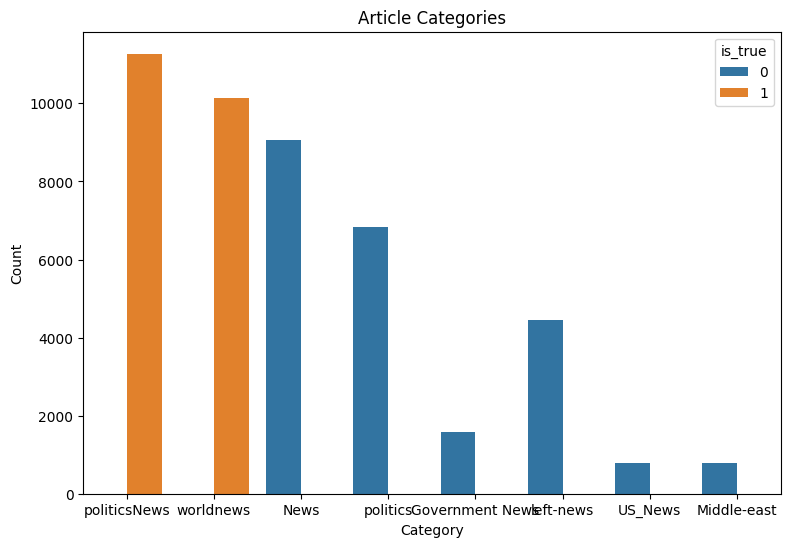

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# plot the value counts for each category with custom colors
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'gray']
# df['subject'].value_counts().plot(kind='bar', color=colors)
plt.figure(figsize=(9 , 6))
sns.countplot(x='subject' , hue='is_true' , data=df)
# add labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Article Categories')

# show the plot
plt.show()

In [11]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')
df['text_len'] = df['text'].str.len()
df['words_count'] = df['text'].apply(lambda x : len(x.split()))
df['stopwords_counts'] = df['text'].apply(lambda x: len([word for word in x.split() if word.lower() in stopwords]))

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
import string 
punctuations = string.punctuation
df['punctuation'] = df['text'].apply(lambda x : len([word for word in x.split() if word in word.lower() in punctuations ]))

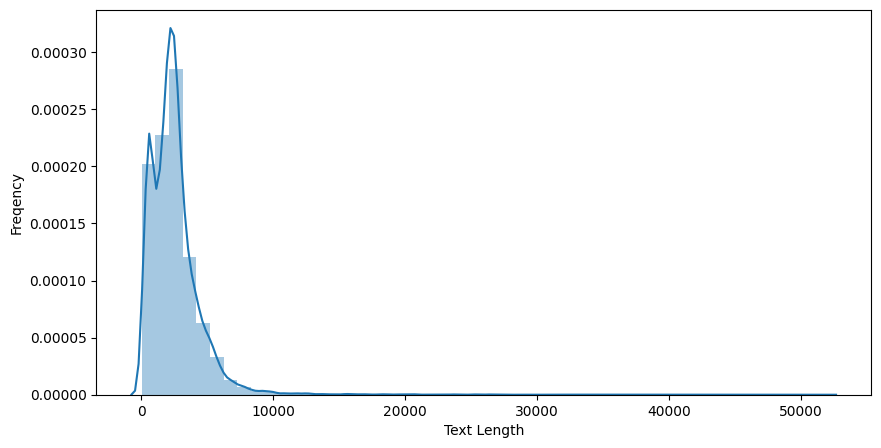

In [13]:
plt.figure(figsize=(10 , 5))
ax = sns.distplot(df['text_len'])
ax.set(xlabel='Text Length' , ylabel='Freqency')
plt.show()

<AxesSubplot: title={'center': 'Kernel distribution of number of words'}, xlabel='words_count', ylabel='Density'>

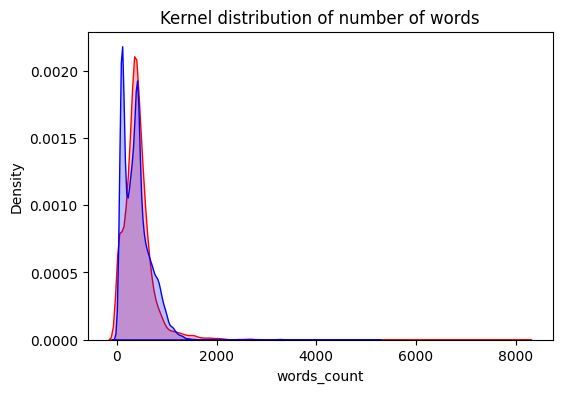

In [14]:
plt.figure(figsize=(6, 4))
num1 = df[df['is_true'] == 0 ]['words_count']
num2 = df[df['is_true'] == 1 ] ['words_count']

sns.kdeplot(num1 , shade=True , color='red').set_title('Kernel distribution of number of words')
sns.kdeplot(num2 ,shade=True , color='blue')

<AxesSubplot: title={'center': 'Kernel distribution of number of words'}, xlabel='stopwords_counts', ylabel='Density'>

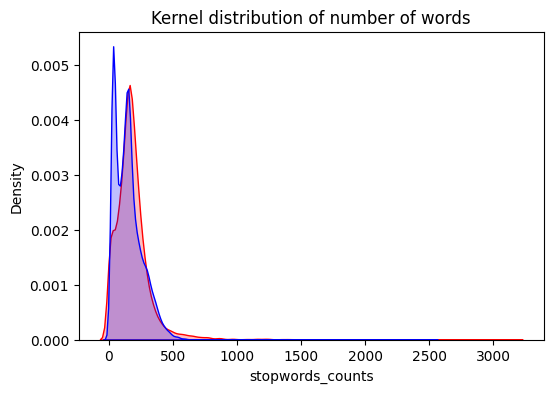

In [15]:
plt.figure(figsize=(6, 4))
num1 = df[df['is_true'] == 0 ]['stopwords_counts']
num2 = df[df['is_true'] == 1 ] ['stopwords_counts']

sns.kdeplot(num1 , shade=True , color='red').set_title('Kernel distribution of number of words')
sns.kdeplot(num2 ,shade=True , color='blue')

<AxesSubplot: title={'center': 'Kernel distribution of number of words'}, xlabel='punctuation', ylabel='Density'>

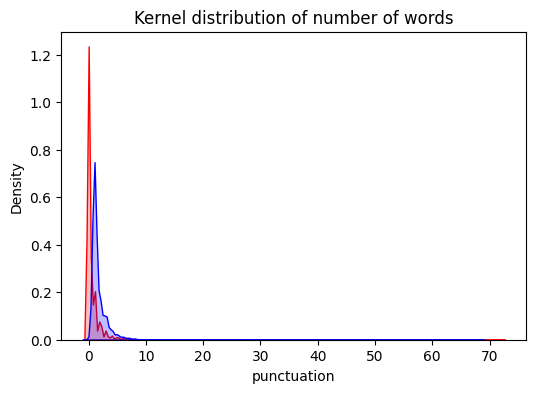

In [16]:
plt.figure(figsize=(6, 4))
num1 = df[df['is_true'] == 0 ]['punctuation']
num2 = df[df['is_true'] == 1 ] ['punctuation']

sns.kdeplot(num1 , shade=True , color='red').set_title('Kernel distribution of number of words')
sns.kdeplot(num2 ,shade=True , color='blue')

In [17]:
# from wordcluod import WordCloud , STOPWORDS
def word_cloud(target):
    wordcloud = WordCloud(stopwords=STOPWORDS , background_color='white' , width=2000 , height=1000 ).generate(" ".join(df[df['is_true']== target]['text']))
    plt.figure(1 , figsize=(15 ,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
     

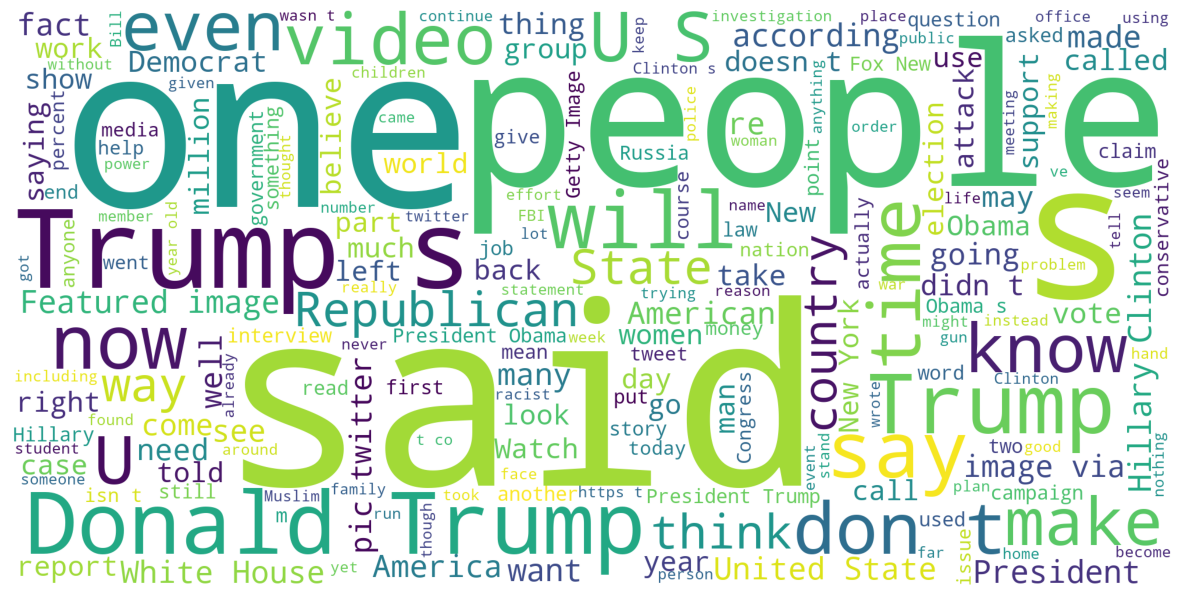

In [18]:
word_cloud(0)

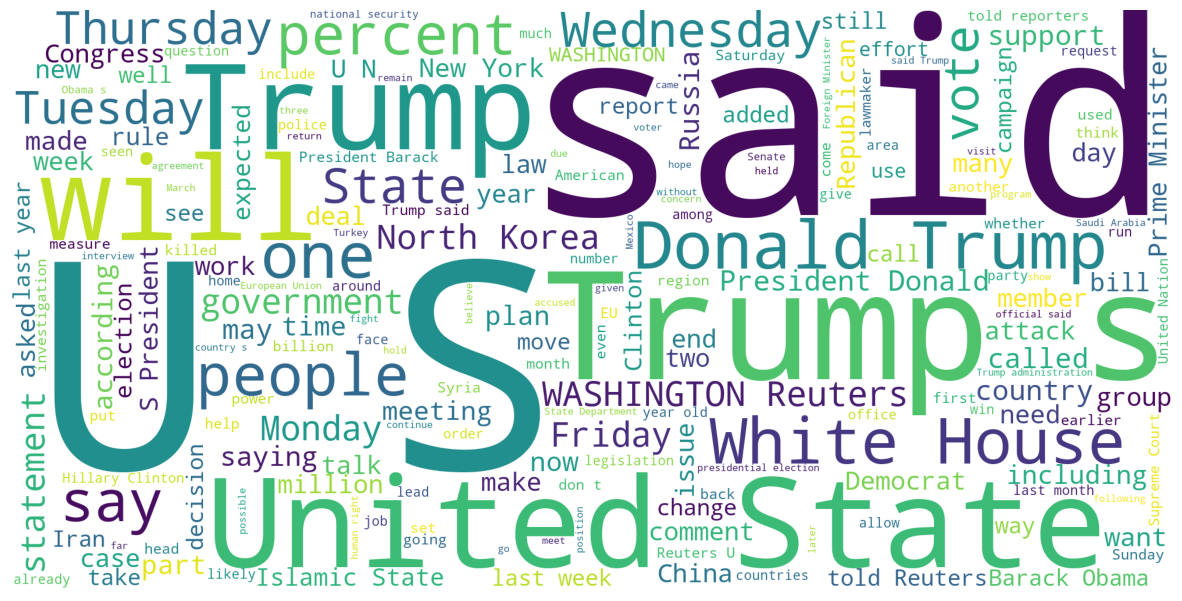

In [19]:
word_cloud(1)

In [20]:
from collections import defaultdict

def generate_ngrams(text , n_grams=1):
    tokens = [token for token in text.lower().split(' ') if token !='' if token not in STOPWORDS ]
    ngrames = zip(*[tokens[i:] for i in range(n_grams) ])
    return [' '.join(ngram) for ngram in ngrames ]


def gen_ngram( n_gram=1 , count=50 ):
    N  = count
    true_news_unigram = defaultdict(int)
    fake_news_unigram = defaultdict(int)
    fake_news_bingram = defaultdict(int)
    true_news_bingram = defaultdict(int)

    for doc in df['text'][df['is_true'] == 1 ]:
        for word in generate_ngrams(doc , n_grams=n_gram):
            true_news_unigram[word] += 1

    for doc in df['text'][df['is_true'] == 0 ]:
        for word in generate_ngrams(doc , n_grams=n_gram):
            fake_news_unigram[word] += 1


    true_news_unigram = pd.DataFrame(sorted(true_news_unigram.items(), key=lambda x: x[1])[::-1])
    fake_news_unigram = pd.DataFrame( sorted(fake_news_unigram.items()  , key=lambda x : x[1] )[::-1])
    fig , axes = plt.subplots(ncols = 2 , figsize=(20 , 50) , dpi=60)
    plt.tight_layout()

    sns.barplot(y=true_news_unigram[0].values[:N] , x=true_news_unigram[1].values[:N] , ax=axes[0] , color='red'  )
    sns.barplot(y=fake_news_unigram[0].values[:N] , x=fake_news_unigram[1].values[:N] , ax=axes[1] , color='blue'  )


    for i in range(2):
        axes[i].spines['right'].set_visible(False)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
        axes[i].tick_params(axis='x', labelsize=13)
        axes[i].tick_params(axis='y', labelsize=13)

    axes[0].set_title(f'Top {N} most common unigrams in True  News', fontsize=15)
    axes[1].set_title(f'Top {N} most common unigrams in Fake  News', fontsize=15)

    plt.show()

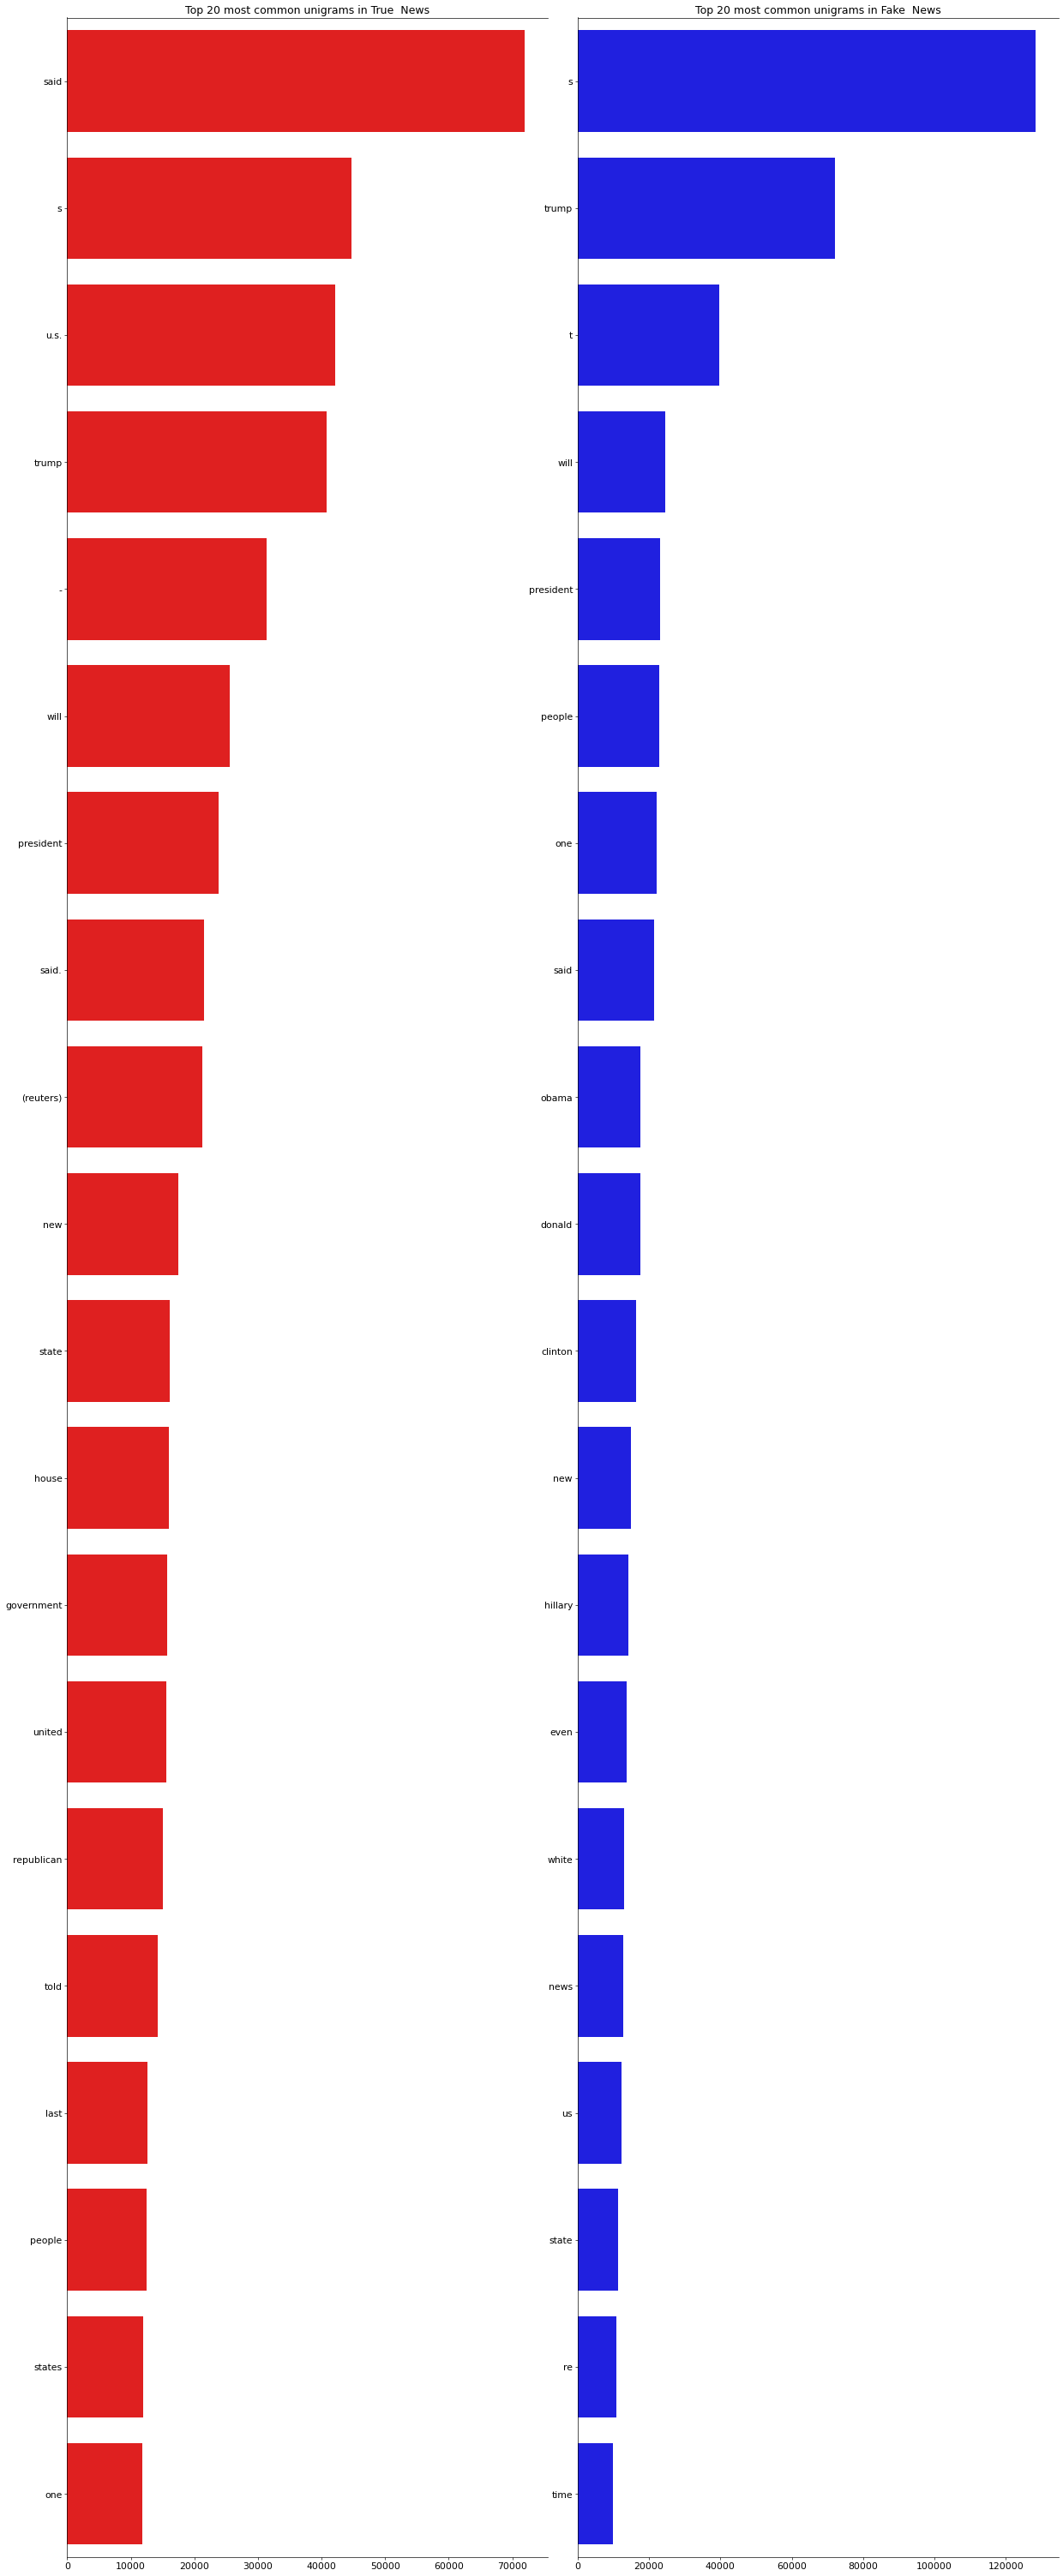

In [21]:
gen_ngram( n_gram=1 , count=20 )

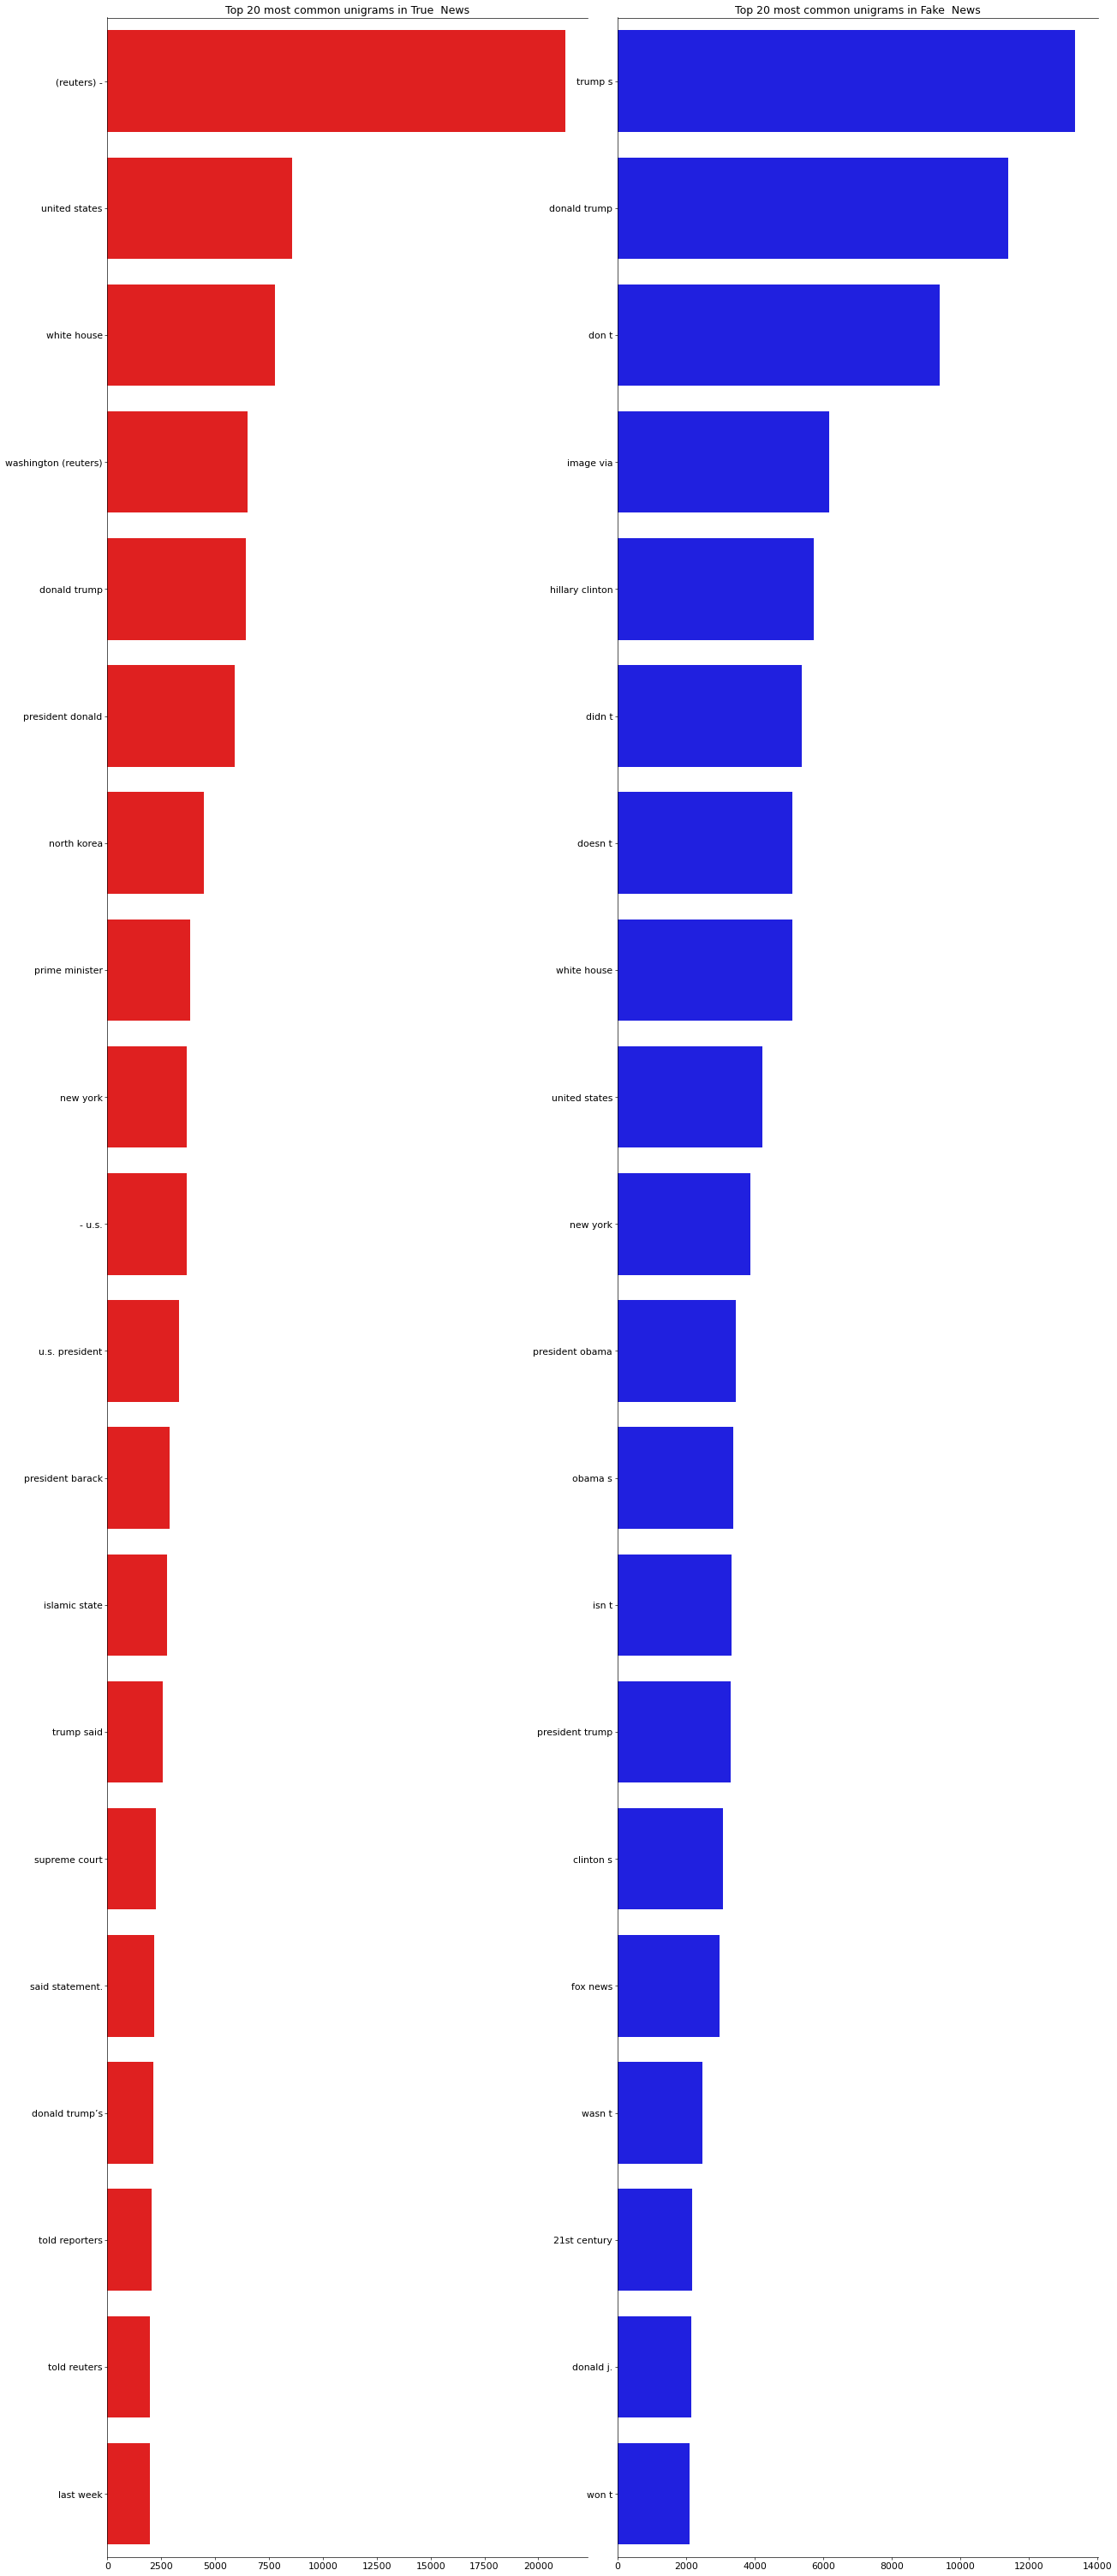

In [22]:
gen_ngram( n_gram=2 , count=20 )

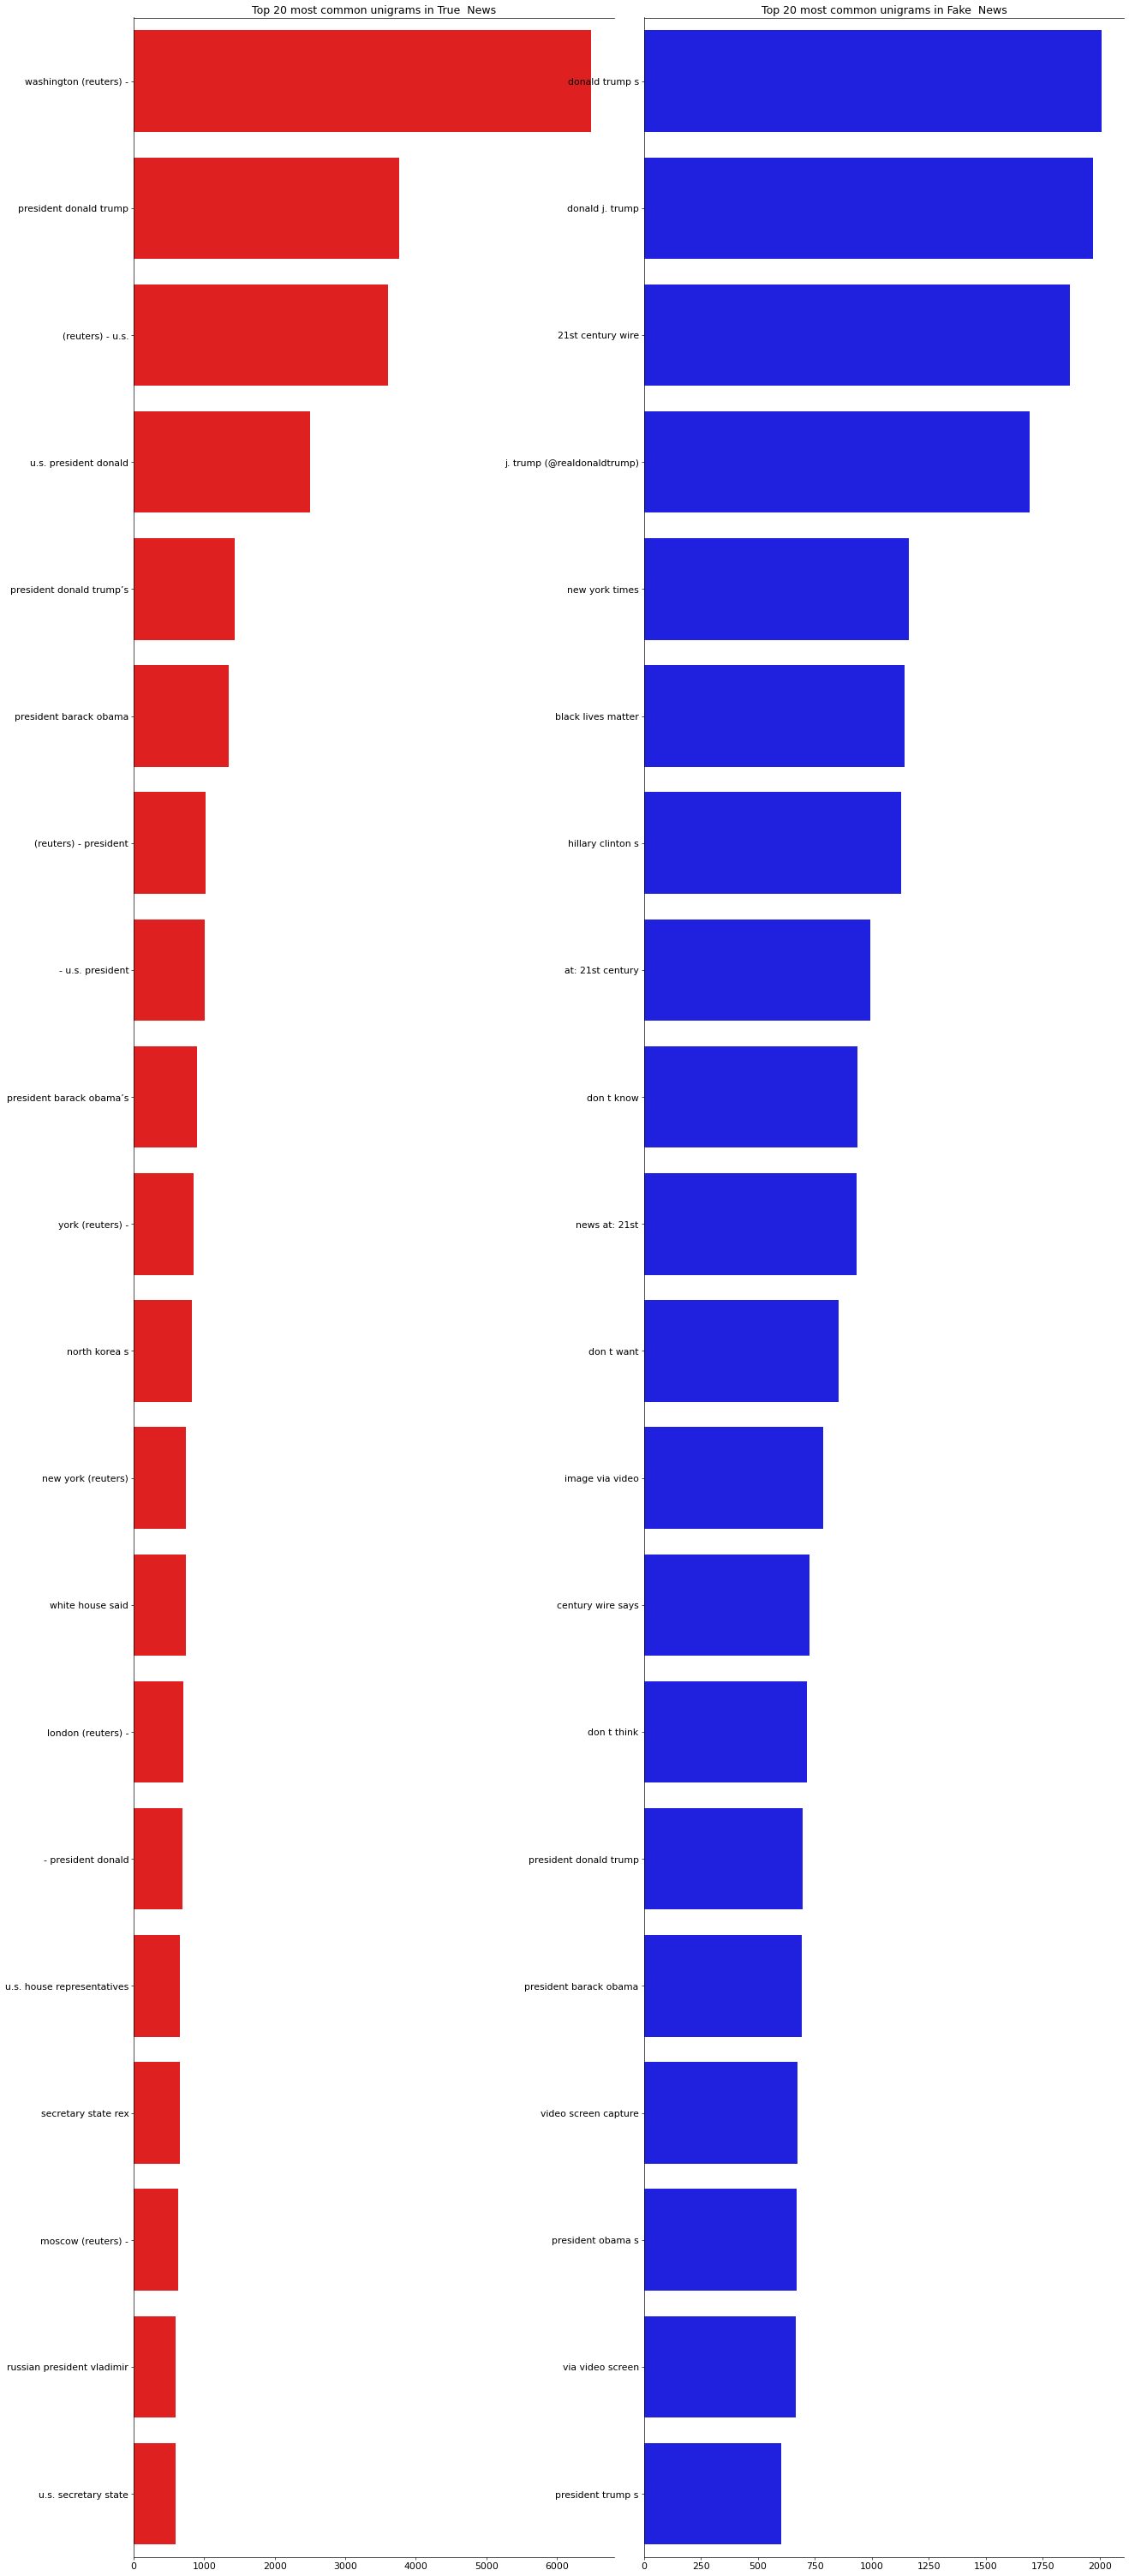

In [23]:
gen_ngram( n_gram=3 , count=20)

In [24]:
def isnumber(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

df['text'] = df['text'].apply(lambda x : isnumber(x))

In [25]:
import string

def remove_punctuation(input_string):
    """Removes punctuation from a string"""
    translator = str.maketrans('', '', string.punctuation)
    return input_string.translate(translator)

df['text'] = df['text'].apply(lambda x : remove_punctuation(x))

In [26]:
import re 
contraction_patterns = [ (r'won\'t', 'will not'), (r'can\'t', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]
def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text
df['text'] = df['text'].apply(lambda x : replaceContraction(x))

In [27]:
def split_camel_case(input_string):
    """Splits camel case words in a string into separate words"""
    words = []
    current_word = ''
    for i, char in enumerate(input_string):
        if i == 0 or (char.isupper() and current_word and current_word.islower()):
            # start a new word if first letter or camel case
            if current_word:
                words.append(current_word)
            current_word = char
        else:
            # add to current word
            current_word += char
    # add final word to list
    if current_word:
        words.append(current_word)
    # join words with space
    return ' '.join(words)

df['text'] = df['text'].apply(lambda x : split_camel_case(x))

In [28]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

def tokenizer(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        if (w not in stoplist):
            finalTokens.append(w)
    text = " ".join(finalTokens)
    return text
    
df['text'] = df['text'].apply(lambda x: tokenizer(x))

In [29]:
df

,text,subject,date,is_true,text_len,words_count,stopwords_counts,punctuation
0,As US budget fight looms Republicans flip fisc...,politicsNews,"December 31, 2017",1,4724,759,284,1
1,US military accept transgender recruits Monday...,politicsNews,"December 29, 2017",1,4142,633,235,3
2,Senior US Republican senator Let Mr Mueller jo...,politicsNews,"December 31, 2017",1,2850,467,186,1
3,FBI Russia probe helped Australian diplomat ti...,politicsNews,"December 30, 2017",1,2521,385,143,1
4,Trump wants Postal Service charge much Amazon ...,politicsNews,"December 29, 2017",1,5274,863,336,1
...,...,...,...,...,...,...,...,...
23476,McPain John McCain Furious That Iran Treated U...,Middle-east,"January 16, 2016",0,3299,532,212,0
23477,JUSTICE Yahoo Settles Email Privacy Classactio...,Middle-east,"January 16, 2016",0,1766,309,133,0
23478,Sunnistan US Allied ‘ Safe Zone ’ Plan Take Te...,Middle-east,"January 15, 2016",0,25151,4185,1796,6
23479,How Blow Million Al Jazeera America Finally Ca...,Middle-east,"January 14, 2016",0,2753,468,180,0


In [30]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer() #set stemmer

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer() # set lemmatizer

def tokenize2(text):
    finalTokens = []
    tokens = nltk.word_tokenize(text)
    for w in tokens:
        finalTokens.append(stemmer.stem(w)) # change this to lemmatizer.lemmatize(w) for Lemmatizing
    text = " ".join(finalTokens)
    return text

df['text'] = df['text'].apply(lambda x: tokenize2(x))

In [31]:
import re

def remove_single_chars(text):
    cleaned_text = re.sub(r'\b\w\b', '', text)
    # Return the cleaned text
    return cleaned_text

df['text'] = df['text'].apply(lambda x: remove_single_chars(x))

In [32]:
df

,text,subject,date,is_true,text_len,words_count,stopwords_counts,punctuation
0,As US budget fight loom republican flip fiscal...,politicsNews,"December 31, 2017",1,4724,759,284,1
1,US militari accept transgend recruit monday pe...,politicsNews,"December 29, 2017",1,4142,633,235,3
2,senior US republican senat let Mr mueller job ...,politicsNews,"December 31, 2017",1,2850,467,186,1
3,fbi russia probe help australian diplomat tipo...,politicsNews,"December 30, 2017",1,2521,385,143,1
4,trump want postal servic charg much amazon shi...,politicsNews,"December 29, 2017",1,5274,863,336,1
...,...,...,...,...,...,...,...,...
23476,mcpain john mccain furiou that iran treat US s...,Middle-east,"January 16, 2016",0,3299,532,212,0
23477,justic yahoo settl email privaci classact law...,Middle-east,"January 16, 2016",0,1766,309,133,0
23478,sunnistan US alli ‘ safe zone ’ plan take terr...,Middle-east,"January 15, 2016",0,25151,4185,1796,6
23479,how blow million Al jazeera america final call...,Middle-east,"January 14, 2016",0,2753,468,180,0


In [33]:
df = df.drop(columns=['date' , 'subject'] , axis=1 )

In [34]:
df['text'] = df['text'].str.lower()

In [35]:
!pip install pyspellchecker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 44.7 MB/s eta 0:00:00


**Spelling Correction**

Even if I'm not good at spelling I can correct it with python :) I will use pyspellcheker to do that.

In [36]:
# from spellchecker import SpellChecker

# spell = SpellChecker()
# def correct_spellings(text):
#     corrected_text = []
#     misspelled_words = spell.unknown(text.split())
#     for word in text.split():
#         if word in misspelled_words:
#             corrected_text.append(spell.correction(word))
#         else:
#             corrected_text.append(word)
#     return " ".join(corrected_text)


# df['text'] =  df['text'].apply(lambda x : correct_spellings(x))

In [37]:
from tqdm import tqdm
from nltk.tokenize import word_tokenize
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stoplist ))]
        corpus.append(words)
    return corpus
        
        


In [38]:
corpus=create_corpus(df)

100%|██████████| 44898/44898 [02:31<00:00, 296.88it/s]


In [39]:
embedding_dict={}
with open('/kaggle/input/glove6b100dtxt/glove.6B.100d.txt',  'r') as f :
    for line in f :
        values= line.split()
        word=values[0]
        vector = np.asarray(values[1:] , 'float32')
        embedding_dict[word] = vector
f.close()

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len= 50

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)

seqences = tokenizer.texts_to_sequences(corpus)
tweet_pad = pad_sequences(seqences , maxlen=max_len , truncating='post' , padding='post')

In [41]:
word_index = tokenizer.word_index
print('number of uniqe word :' , len(word_index))

number of uniqe word : 183346


In [42]:
num_words = len(word_index)+1
embedding_matrix= np.zeros((num_words ,100 ))

for word , i in tqdm(word_index.items()):
    if i > num_words:
        continue
    embed_vector = embedding_dict.get(word)
    if embed_vector is not None:
        embedding_matrix[i]=embed_vector
        

100%|██████████| 183346/183346 [00:00<00:00, 595822.37it/s]


In [43]:
model=Sequential()

embedding=Embedding(num_words,100,embeddings_initializer=Constant(embedding_matrix),
                   input_length=max_len,trainable=False)
max_len
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


optimzer=Adam(learning_rate=1e-5)

model.compile(loss='binary_crossentropy',optimizer=optimzer,metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 100)           18334700  
                                                                 
 spatial_dropout1d (SpatialD  (None, 50, 100)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 18,377,005
Trainable params: 42,305
Non-trainable params: 18,334,700
_________________________________________________________________


In [45]:
tweet_pad.shape

(44898, 50)

In [46]:
from sklearn.model_selection import train_test_split

# split data into training and test sets (80/20 split)
train_data, test_data, train_labels, test_labels = train_test_split(tweet_pad , df['is_true'] , test_size=0.2, random_state=42)

# split training data into training and validation sets (80/20 split)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.2, random_state=42)

In [47]:
print("Training data shape:", train_data.shape)
print("Training labels shape:", train_labels.shape)
print("Validation data shape:", val_data.shape)
print("Validation labels shape:", val_labels.shape)
print("Test data shape:", test_data.shape)
print("Test labels shape:", test_labels.shape)

Training data shape: (28734, 50)
Training labels shape: (28734,)
Validation data shape: (7184, 50)
Validation labels shape: (7184,)
Test data shape: (8980, 50)
Test labels shape: (8980,)


In [48]:
history = model.fit(train_data , train_labels , batch_size=4 , epochs=15 , validation_data=(val_data , val_labels ) , verbose=2)

Epoch 1/15
7184/7184 - 298s - loss: 0.5580 - accuracy: 0.7199 - val_loss: 0.3174 - val_accuracy: 0.8860 - 298s/epoch - 41ms/step
Epoch 2/15
7184/7184 - 292s - loss: 0.2894 - accuracy: 0.8915 - val_loss: 0.2223 - val_accuracy: 0.9272 - 292s/epoch - 41ms/step
Epoch 3/15
7184/7184 - 290s - loss: 0.2283 - accuracy: 0.9167 - val_loss: 0.1770 - val_accuracy: 0.9454 - 290s/epoch - 40ms/step
Epoch 4/15
7184/7184 - 287s - loss: 0.1920 - accuracy: 0.9318 - val_loss: 0.1316 - val_accuracy: 0.9602 - 287s/epoch - 40ms/step
Epoch 5/15
7184/7184 - 292s - loss: 0.1649 - accuracy: 0.9433 - val_loss: 0.1045 - val_accuracy: 0.9705 - 292s/epoch - 41ms/step
Epoch 6/15
7184/7184 - 289s - loss: 0.1397 - accuracy: 0.9511 - val_loss: 0.0793 - val_accuracy: 0.9776 - 289s/epoch - 40ms/step
Epoch 7/15
7184/7184 - 297s - loss: 0.1152 - accuracy: 0.9614 - val_loss: 0.0646 - val_accuracy: 0.9819 - 297s/epoch - 41ms/step
Epoch 8/15
7184/7184 - 285s - loss: 0.0902 - accuracy: 0.9701 - val_loss: 0.0417 - val_accuracy: 

In [49]:
# make predictions on the test set
test_predictions = model.predict(test_data)

# evaluate the predictions on the test set
test_loss, test_acc = model.evaluate(test_data, test_labels, verbose=0)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

281/281 [==============================] - 3s 10ms/step
Test loss: 0.018631812185049057
Test accuracy: 0.9963251948356628


In [50]:
from sklearn.metrics import classification_report

# make predictions on the test set
test_predictions = model.predict(test_data)

# convert the predicted probabilities to class labels
test_predictions = np.argmax(test_predictions, axis=1)

# generate a classification report
target_names = ['real', 'fake']
print(classification_report(test_labels, test_predictions, target_names=target_names))

281/281 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

        real       0.52      1.00      0.68      4650
        fake       0.00      0.00      0.00      4330

    accuracy                           0.52      8980
   macro avg       0.26      0.50      0.34      8980
weighted avg       0.27      0.52      0.35      8980

